In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
%matplotlib inline
from get_forex_data import get_daily_data, get_small_frequencies

from plot import plot_basic_close, pred_vs_real_plot

In [2]:
import yfinance as yf
yf.pdr_override()

In [4]:
PAIR = 'EURGBP'
START = '2022-01-01'
END = '2023-09-16'

In [64]:
df_hourly = get_small_frequencies(PAIR, period='120', interval='1h')
df_hourly = df_hourly.reset_index()
df_hourly.tail()

[*********************100%%**********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume
18,2023-09-15 18:00:00+01:00,0.86068,0.86120,0.86054,0.86104,0.86104,0
19,2023-09-15 19:00:00+01:00,0.86103,0.86130,0.86063,0.86095,0.86095,0
20,2023-09-15 20:00:00+01:00,0.86096,0.86114,0.86066,0.86072,0.86072,0
21,2023-09-15 21:00:00+01:00,0.86072,0.86111,0.86029,0.86063,0.86063,0
22,2023-09-15 22:00:00+01:00,0.86053,0.86093,0.86053,0.86093,0.86093,0


### Create date & time from timestamp

In [65]:
df_hourly['date'] = df_hourly.Datetime.apply(lambda x: x.date())
df_hourly['time'] = df_hourly.Datetime.apply(lambda x: x.time())

In [66]:
df_hourly.drop('Datetime', axis=1, inplace=True)



In [67]:
df_hourly.tail(35)

,Open,High,Low,Close,Adj Close,Volume,date,time
0,0.85761,0.85770,0.85740,0.85757,0.85757,0,2023-09-15,00:00:00
1,0.85758,0.85770,0.85737,0.85740,0.85740,0,2023-09-15,01:00:00
2,0.85742,0.85750,0.85706,0.85714,0.85714,0,2023-09-15,02:00:00
3,0.85717,0.85735,0.85687,0.85696,0.85696,0,2023-09-15,03:00:00
4,0.85697,0.85730,0.85695,0.85709,0.85709,0,2023-09-15,04:00:00
5,0.85712,0.85716,0.85693,0.85710,0.85710,0,2023-09-15,05:00:00
6,0.85713,0.85740,0.85704,0.85738,0.85738,0,2023-09-15,06:00:00
7,0.85737,0.85821,0.85731,0.85783,0.85783,0,2023-09-15,07:00:00
8,0.85787,0.85810,0.85720,0.85748,0.85748,0,2023-09-15,08:00:00
9,0.85746,0.85784,0.85700,0.85733,0.85733,0,2023-09-15,09:00:00


In [70]:
df_hourly.date.min()

datetime.date(2023, 9, 15)

In [69]:
EURGBP_data_tst = EURGBP_data[EURGBP_data['date']=="2019.10.25"].reset_index()

KeyError: 'date'

In [ ]:
EURGBP_data_tst.tail()

In [78]:
len(EURGBP_data_tst)

1019

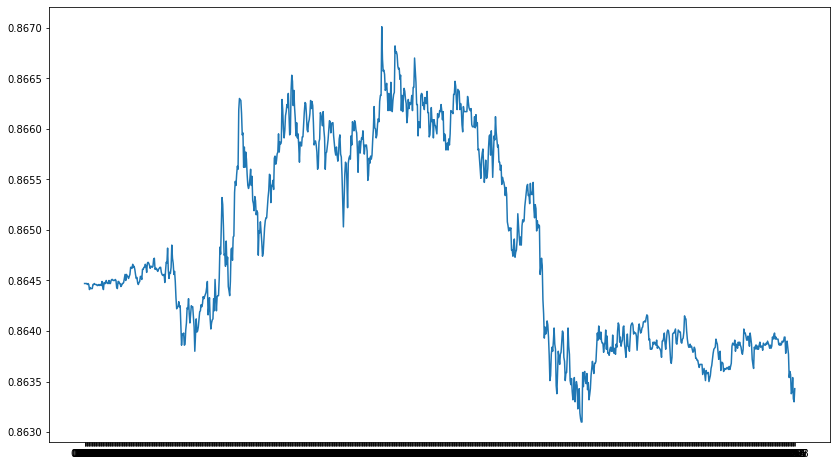

In [77]:
plt.figure(figsize=(14,8))
plt.plot(EURGBP_data_tst.time, EURGBP_data_tst.close)

In [44]:
EURGBP_data_tst['time_'] = EURGBP_data_tst.index

In [45]:
EURGBP_data_tst = EURGBP_data_tst.drop("index", axis=1)

In [46]:
EURGBP_data_tst = EURGBP_data_tst.drop("time", axis=1)

In [47]:
EURGBP_data_tst.head()

,date,open,max,min,close,delta,time_
0,2019.10.01,0.88622,0.88627,0.88622,0.88625,0.00003,0
1,2019.10.01,0.88624,0.88629,0.88624,0.88626,0.00002,1
2,2019.10.01,0.88628,0.88634,0.88628,0.88634,0.00006,2
3,2019.10.01,0.88633,0.88636,0.88630,0.88632,-0.00001,3
4,2019.10.01,0.88633,0.88634,0.88633,0.88634,0.00001,4


In [48]:
len(EURGBP_data_tst)

1437

In [49]:
EURGBP_data_tst = EURGBP_data_tst[["close","time_"]]

In [51]:
EURGBP_data_tst.head()

,close,time_
0,0.88625,0
1,0.88626,1
2,0.88634,2
3,0.88632,3
4,0.88634,4


In [52]:
series = EURGBP_data_tst.close.to_numpy()

In [53]:
series

array([0.88625, 0.88626, 0.88634, ..., 0.89024, 0.89036, 0.89044])

In [54]:
time = EURGBP_data_tst.time_.to_numpy()

In [55]:
time

array([   0,    1,    2, ..., 1434, 1435, 1436], dtype=int64)

In [56]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [57]:
len(time_valid), len(x_valid)

(437, 437)

In [58]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [59]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [60]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [61]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=20, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=20, callbacks=[lr_schedule])

W1103 19:59:04.972911  3148 deprecation.py:323] From C:\Users\hero144\.conda\envs\py36\lib\site-packages\tensorflow\python\data\util\random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
49/49 [==============================] - 1s 26ms/step - loss: 4.3927 - mae: 4.8927
Epoch 2/20
49/49 [==============================] - 0s 9ms/step - loss: 4.0987 - mae: 4.5987A: 0s - loss: 4.2366 - mae: 
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 3.7544 - mae: 4.2544
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 3.3639 - mae: 3.8639
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 2.9216 - mae: 3.4216
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 2.4215 - mae: 2.9215
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 1.8575 - mae: 2.3575
Epoch 8/20
49/49 [==============================] - 0s 9ms/step - loss: 1.2240 - mae: 1.7240
Epoch 9/20
49/49 [==============================] - 0s 9ms/step - loss: 0.5295 - mae: 1.0201
Epoch 10/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0986 - mae: 0.4260
Epoch 11/20
49/49 [=====================

[1e-08, 0.0001, 0, 30]

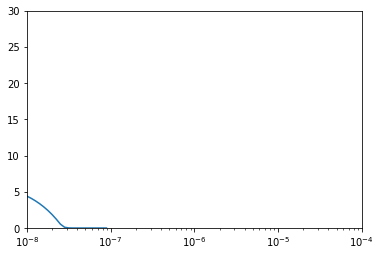

In [62]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [63]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=20, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(20, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 50.0)
])

optimizer = tf.keras.optimizers.SGD(lr=5e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=24)

Epoch 1/24
49/49 [==============================] - 1s 25ms/step - loss: 48.8034 - mae: 49.3034
Epoch 2/24
49/49 [==============================] - 0s 9ms/step - loss: 47.0741 - mae: 47.5741A: 0s - loss: 47.8512 - mae: 4
Epoch 3/24
49/49 [==============================] - 0s 9ms/step - loss: 45.0903 - mae: 45.5904
Epoch 4/24
49/49 [==============================] - 0s 9ms/step - loss: 42.8392 - mae: 43.3392
Epoch 5/24
49/49 [==============================] - 0s 9ms/step - loss: 40.2178 - mae: 40.7178
Epoch 6/24
49/49 [==============================] - 0s 9ms/step - loss: 37.0966 - mae: 37.5966
Epoch 7/24
49/49 [==============================] - 0s 8ms/step - loss: 33.3729 - mae: 33.8729
Epoch 8/24
49/49 [==============================] - 0s 9ms/step - loss: 29.1067 - mae: 29.6067
Epoch 9/24
49/49 [==============================] - 0s 9ms/step - loss: 24.6094 - mae: 25.1094
Epoch 10/24
49/49 [==============================] - ETA: 0s - loss: 20.5085 - mae: 21.008 - 0s 9ms/step - loss: 2

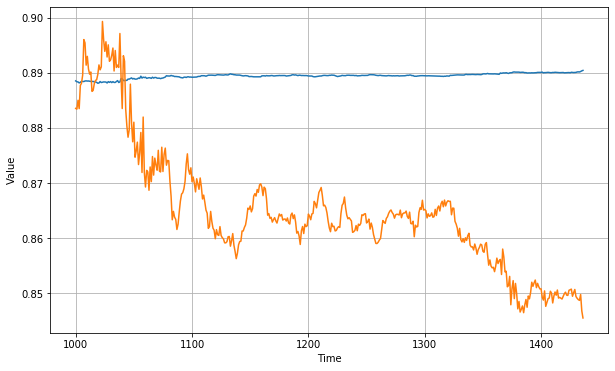

In [64]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

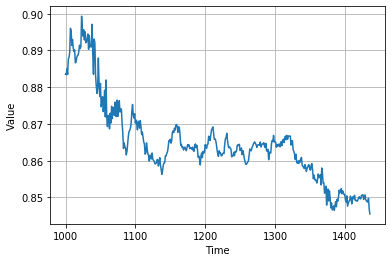

In [65]:

plot_series(time_valid, results)

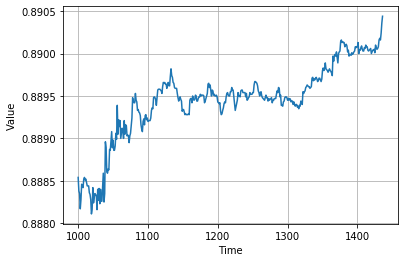

In [66]:
plot_series(time_valid, x_valid)

In [67]:
x_valid

array([0.88854, 0.88838, 0.88835, 0.88817, 0.88828, 0.88846, 0.88843,
       0.88842, 0.88852, 0.88854, 0.88851, 0.88852, 0.88848, 0.88844,
       0.88844, 0.88844, 0.88836, 0.88834, 0.88828, 0.88811, 0.88816,
       0.88842, 0.88824, 0.8883 , 0.88835, 0.88833, 0.88833, 0.88816,
       0.8884 , 0.88827, 0.88841, 0.88823, 0.8884 , 0.88826, 0.88826,
       0.88842, 0.88859, 0.88825, 0.88835, 0.88896, 0.88889, 0.88861,
       0.88859, 0.88864, 0.88863, 0.88887, 0.88886, 0.88897, 0.88908,
       0.88889, 0.88898, 0.88886, 0.88886, 0.88891, 0.88906, 0.88899,
       0.88939, 0.88905, 0.88922, 0.88914, 0.88921, 0.889  , 0.88906,
       0.88912, 0.88909, 0.889  , 0.88921, 0.88905, 0.88916, 0.88915,
       0.88903, 0.88904, 0.88903, 0.88895, 0.88903, 0.88906, 0.88915,
       0.88924, 0.88948, 0.88943, 0.88942, 0.88942, 0.88953, 0.88945,
       0.88943, 0.88933, 0.88934, 0.88931, 0.8893 , 0.88927, 0.88916,
       0.88911, 0.88908, 0.8892 , 0.88923, 0.88916, 0.88927, 0.88928,
       0.88922, 0.88

In [68]:
results = -results

In [69]:
results

array([-0.88354665, -0.88340807, -0.88501817, -0.88350886, -0.88771415,
       -0.8881163 , -0.88958406, -0.89603734, -0.8954401 , -0.8914005 ,
       -0.8929937 , -0.89067316, -0.8897597 , -0.8901465 , -0.88663965,
       -0.88680935, -0.88804376, -0.88862216, -0.888739  , -0.889698  ,
       -0.8914391 , -0.8905444 , -0.89109206, -0.89932626, -0.8960442 ,
       -0.8939014 , -0.89564025, -0.8928766 , -0.895082  , -0.8920962 ,
       -0.89235324, -0.8931877 , -0.89450216, -0.89033425, -0.8940559 ,
       -0.89097804, -0.891412  , -0.89098626, -0.8971378 , -0.88925326,
       -0.88352036, -0.89310503, -0.89209324, -0.88335115, -0.88032484,
       -0.8783145 , -0.8796498 , -0.88794625, -0.8809328 , -0.8774854 ,
       -0.8810401 , -0.87468696, -0.8757997 , -0.8774167 , -0.8733524 ,
       -0.87548995, -0.87917495, -0.87191164, -0.88197386, -0.8719189 ,
       -0.86927825, -0.872293  , -0.87200904, -0.8686846 , -0.87291336,
       -0.87025166, -0.87480545, -0.87143725, -0.8745205 , -0.87

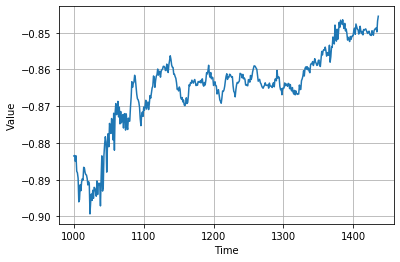

In [70]:
plot_series(time_valid, results)

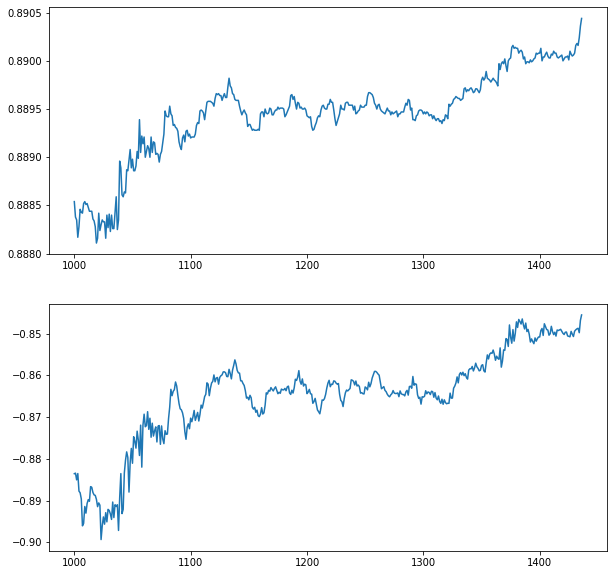

In [71]:

fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].plot(time_valid, x_valid)
axs[1].plot(time_valid, results)